# **Converting PascalVOC Format (XML Files) to YOLO Format (Txt Files)**

In [ ]:
import os
import xml.etree.ElementTree as ET

# Convert PascalVOC XML annotation to YOLO format for the "person" class (class_id 0)
def convert_voc_to_yolo(xml_file, output_dir, img_width, img_height):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Specify the class name we want to detect (in this case, 'person')
    target_class = 'person'

    output_file = os.path.join(output_dir, os.path.splitext(os.path.basename(xml_file))[0] + '.txt')
    with open(output_file, 'w') as yolo_file:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            # Only process objects of the class 'person'
            if class_name == target_class:
                class_id = 0  # Since we are only interested in 'person', its class_id will be 0
                xml_box = obj.find('bndbox')
                xmin = int(xml_box.find('xmin').text)
                ymin = int(xml_box.find('ymin').text)
                xmax = int(xml_box.find('xmax').text)
                ymax = int(xml_box.find('ymax').text)

                # Convert to YOLO format (normalized x_center, y_center, width, height)
                x_center = ((xmin + xmax) / 2.0) / img_width
                y_center = ((ymin + ymax) / 2.0) / img_height
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                # Write only the 'person' class annotations to the YOLO file
                yolo_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# Directory containing PascalVOC XML files
input_xml_dir = '/content/drive/MyDrive/datasets/XML_Labels'

# Directory where YOLO format annotations will be saved
output_yolo_dir = '/content/drive/MyDrive/datasets/labels'

# Loop through all XML files in the input directory
for xml_file in os.listdir(input_xml_dir):
    if xml_file.endswith('.xml'):
        # Assume fixed image width and height (can use actual dimensions if available)
        convert_voc_to_yolo(os.path.join(input_xml_dir, xml_file), output_yolo_dir, img_width=1280, img_height=720)

print("Conversion to YOLO format complete. Only 'person' class labels retained.")


Conversion to YOLO format complete. Only 'person' class labels retained.


In [3]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 49.9 MB/s eta 0:00:00


# **Creating yaml file to detect person from whole image**

In [ ]:

yaml_content = """
train: /content/drive/MyDrive/datasets/images
val: /content/drive/MyDrive/datasets/images

nc: 1  # Number of classes
names: ['person']  # Class names

"""

# Step 2: Save the YAML content to a file
with open('data1.yaml', 'w') as file:
    file.write(yaml_content)

print("YAML file created!")

# Step 3: Download the file to your local machine
from google.colab import files
files.download('data1.yaml')


YAML file created!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Training The Model To Detect Person**

In [12]:
from ultralytics import YOLO

# Load the YOLOv8 model (v8s is small, use v8l for larger models)
model = YOLO('yolov8n')

# Train model
model.train(
    data='/content/data1.yaml',  # Path to your data.yaml
    epochs=50,                  # Number of epochs for training
    imgsz=640,                  # Image size for training
    batch=32,                   # Batch size for training
    amp=True    # Enable automatic mixed precision
)


Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data1.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 125MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 270MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/datasets/labels.cache... 416 images, 7 backgrounds, 4 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001059.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0076]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001846.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0389]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001951.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1597      1.2167]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/005278.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/datasets/labels.cache... 416 images, 7 backgrounds, 4 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001059.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0076]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001846.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0389]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001951.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1597      1.2167]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/005278.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.24G      3.687      4.055      2.998        134        640: 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]

                   all        412       1275    0.00363      0.352    0.00797    0.00271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       4.7G      3.041       3.69      2.302        153        640: 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.13s/it]


                   all        412       1275    0.00269      0.261    0.00376   0.000937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.84G      2.987      3.404      2.223        161        640: 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        412       1275    0.00166      0.161    0.00245   0.000603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.76G       2.93      3.297      2.231        135        640: 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]

                   all        412       1275    0.00272      0.264    0.00274   0.000669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.72G      2.885       3.22      2.227        153        640: 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]

                   all        412       1275    0.00339      0.329    0.00298   0.000812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.73G       2.88      3.222      2.244        134        640: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.19s/it]

                   all        412       1275    0.00456      0.442     0.0128     0.0036



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       4.7G       2.88      3.175      2.257        144        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]

                   all        412       1275     0.0298     0.0314     0.0074    0.00208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.73G      2.886      3.176      2.255        167        640: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]

                   all        412       1275     0.0208     0.0675    0.00758    0.00201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.9G      2.871      3.157      2.229        192        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        412       1275     0.0225     0.0133    0.00721    0.00177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.72G      2.857      3.206      2.236        145        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]

                   all        412       1275     0.0154      0.051     0.0101    0.00282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.78G      2.812      3.097      2.208        217        640: 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.15s/it]

                   all        412       1275     0.0205     0.0722     0.0122    0.00488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.74G      2.787      3.075      2.217        136        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


                   all        412       1275     0.0403     0.0431     0.0122    0.00318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.7G      2.746       3.06      2.251        148        640: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]


                   all        412       1275     0.0656     0.0965     0.0285    0.00833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.86G      2.754      3.115      2.232        150        640: 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        412       1275     0.0853     0.0656     0.0272    0.00889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.79G      2.709      3.038      2.205         92        640: 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        412       1275     0.0737     0.0722     0.0281    0.00763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.66G      2.747       3.11      2.236        112        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.17s/it]


                   all        412       1275     0.0373      0.157     0.0193    0.00566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       4.7G      2.712      3.007      2.173        240        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


                   all        412       1275      0.075        0.1      0.027    0.00717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.72G      2.656      2.957      2.118        124        640: 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]


                   all        412       1275     0.0712     0.0659     0.0247    0.00758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.72G      2.651      2.928      2.131        134        640: 100%|██████████| 13/13 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


                   all        412       1275      0.209     0.0408     0.0388     0.0125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.84G      2.645      2.939      2.116        121        640: 100%|██████████| 13/13 [00:06<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]

                   all        412       1275     0.0342      0.212     0.0255    0.00677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.71G      2.607      2.951      2.101        175        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]


                   all        412       1275      0.134      0.126     0.0617     0.0213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.72G      2.587      2.963      2.101        153        640: 100%|██████████| 13/13 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        412       1275      0.115     0.0784     0.0395     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.7G       2.58      2.907      2.063        120        640: 100%|██████████| 13/13 [00:08<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        412       1275      0.152      0.071     0.0488     0.0147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.73G      2.528      2.954      2.072        116        640: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]

                   all        412       1275    0.00659      0.538     0.0162    0.00426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.69G      2.569      2.876      2.092        183        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.00s/it]


                   all        412       1275      0.194     0.0894     0.0698     0.0221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.85G       2.53      2.868      2.071        124        640: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]


                   all        412       1275      0.142      0.129     0.0615     0.0208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       4.7G      2.539      2.817      2.043        141        640: 100%|██████████| 13/13 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        412       1275      0.145      0.136     0.0729     0.0244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.71G      2.541      2.817      2.041        157        640: 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        412       1275      0.203      0.115     0.0844     0.0254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.66G      2.464      2.794      2.013        131        640: 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.08s/it]

                   all        412       1275      0.162      0.108     0.0653     0.0219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.73G      2.434       2.76      2.005        153        640: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


                   all        412       1275      0.159      0.192     0.0954     0.0332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.71G      2.443       2.78      1.981        176        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        412       1275      0.166      0.164     0.0928     0.0347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.76G      2.393      2.735      1.968        147        640: 100%|██████████| 13/13 [00:09<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        412       1275      0.238      0.217      0.128     0.0446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.75G       2.46        2.8      1.988        157        640: 100%|██████████| 13/13 [00:07<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        412       1275      0.208      0.125     0.0916     0.0316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       4.8G      2.451      2.704      1.999        197        640: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]


                   all        412       1275      0.226       0.18      0.116       0.04

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.72G      2.395      2.662      1.907        155        640: 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        412       1275      0.208      0.208      0.124     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.71G      2.384      2.635      1.924        135        640: 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        412       1275      0.167      0.192     0.0929      0.032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.7G      2.321      2.708      1.921        131        640: 100%|██████████| 13/13 [00:08<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        412       1275       0.12      0.144     0.0717     0.0258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.72G      2.413      2.664      1.938        166        640: 100%|██████████| 13/13 [00:06<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]

                   all        412       1275      0.113       0.19     0.0859     0.0319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.72G      2.381      2.692      1.937        128        640: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


                   all        412       1275      0.201      0.202       0.13      0.048

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.75G      2.309       2.56      1.881        170        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        412       1275      0.212      0.223      0.127     0.0483


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.66G      2.263      2.689      1.933         58        640: 100%|██████████| 13/13 [00:12<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        412       1275      0.192      0.243      0.138     0.0474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       4.7G      2.218      2.565      1.915         82        640: 100%|██████████| 13/13 [00:08<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]


                   all        412       1275      0.164      0.242       0.11     0.0407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.72G      2.225      2.528      1.876         62        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]

                   all        412       1275      0.196      0.251      0.135      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.66G      2.199      2.518      1.904         75        640: 100%|██████████| 13/13 [00:05<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


                   all        412       1275      0.216      0.252      0.146     0.0579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       4.7G      2.178       2.44      1.883         70        640: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.51it/s]

                   all        412       1275      0.255      0.277      0.174     0.0709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       4.7G       2.14      2.445      1.871         71        640: 100%|██████████| 13/13 [00:08<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        412       1275      0.276      0.283      0.193     0.0761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.7G      2.142      2.419      1.865         76        640: 100%|██████████| 13/13 [00:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


                   all        412       1275       0.26      0.266       0.17     0.0675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       4.7G      2.104      2.357      1.809         73        640: 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]


                   all        412       1275      0.272      0.296      0.197     0.0797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.7G      2.128      2.379      1.828         64        640: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        412       1275      0.276      0.314      0.207     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       4.7G      2.119      2.374      1.831         68        640: 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        412       1275      0.296       0.32      0.224     0.0926



50 epochs completed in 0.201 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]


                   all        412       1275      0.298      0.322      0.224     0.0928
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4cb50a5120>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# **Using The Person Trained Model Cropping The Person**

In [ ]:
import cv2
import os
from ultralytics import YOLO

# Load the trained person detection model
person_model = YOLO('/content/yolov8n.pt')

def crop_person_images(img_dir, output_dir):
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    for img_file in os.listdir(img_dir):
        img_path = os.path.join(img_dir, img_file)

        # Check if the file is an image (skip non-image files)
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            print(f"Skipping non-image file: {img_file}")
            continue

        img = cv2.imread(img_path)

        # Check if the image was loaded successfully
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue

        # Inference for person detection
        results = person_model(img)
        for i, box in enumerate(results[0].boxes.xyxy):
            xmin, ymin, xmax, ymax = map(int, box)
            cropped_img = img[ymin:ymax, xmin:xmax]

            # Save cropped image for PPE training
            output_img_path = os.path.join(output_dir, f'{os.path.splitext(img_file)[0]}_person{i}.jpg')
            cv2.imwrite(output_img_path, cropped_img)
            print(f"Saved cropped person image: {output_img_path}")

# Crop person images for PPE detection
crop_person_images('/content/drive/MyDrive/datasets/images', '/content/drive/MyDrive/datasets/Cropped_images')




0: 640x640 5 persons, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Saved cropped person image: /content/drive/MyDrive/datasets/Cropped_images/Aitin3205_jpg.rf.0e0bc650138d83144f9e7196dd2bec38_person0.jpg
Saved cropped person image: /content/drive/MyDrive/datasets/Cropped_images/Aitin3205_jpg.rf.0e0bc650138d83144f9e7196dd2bec38_person1.jpg
Saved cropped person image: /content/drive/MyDrive/datasets/Cropped_images/Aitin3205_jpg.rf.0e0bc650138d83144f9e7196dd2bec38_person2.jpg
Saved cropped person image: /content/drive/MyDrive/datasets/Cropped_images/Aitin3205_jpg.rf.0e0bc650138d83144f9e7196dd2bec38_person3.jpg
Saved cropped person image: /content/drive/MyDrive/datasets/Cropped_images/Aitin3205_jpg.rf.0e0bc650138d83144f9e7196dd2bec38_person4.jpg

0: 640x640 4 persons, 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Saved cropped person image: /content/drive/MyDrive/datasets/Cro

# **Converting Lables for specified Classes**

In [ ]:
import os
import xml.etree.ElementTree as ET

# Convert PascalVOC XML annotation to YOLO format for the specified classes
def convert_voc_to_yolo(xml_file, output_dir, img_width, img_height):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Define the target classes and their corresponding class IDs
    target_classes = {
        'hard-hat': 0,   # Class ID 1
        'gloves': 1,     # Class ID 2
        'mask': 2,       # Class ID 3
        'glasses': 3,    # Class ID 4
        'boots': 4       # Class ID 5
    }

    output_file = os.path.join(output_dir, os.path.splitext(os.path.basename(xml_file))[0] + '.txt')
    with open(output_file, 'w') as yolo_file:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            # Process only the target classes
            if class_name in target_classes:
                class_id = target_classes[class_name]
                xml_box = obj.find('bndbox')
                xmin = int(xml_box.find('xmin').text)
                ymin = int(xml_box.find('ymin').text)
                xmax = int(xml_box.find('xmax').text)
                ymax = int(xml_box.find('ymax').text)

                # Convert to YOLO format (normalized x_center, y_center, width, height)
                x_center = ((xmin + xmax) / 2.0) / img_width
                y_center = ((ymin + ymax) / 2.0) / img_height
                width = (xmax - xmin) / img_width
                height = (ymax - ymin) / img_height

                # Write only the specified class annotations to the YOLO file
                yolo_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# Directory containing PascalVOC XML files
input_xml_dir = '/content/drive/MyDrive/datasets/XML_Labels'

# Directory where YOLO format annotations will be saved
output_yolo_dir = '/content/drive/MyDrive/datasets/labels'

# Loop through all XML files in the input directory
for xml_file in os.listdir(input_xml_dir):
    if xml_file.endswith('.xml'):
        # Assume fixed image width and height (can use actual dimensions if available)
        convert_voc_to_yolo(os.path.join(input_xml_dir, xml_file), output_yolo_dir, img_width=1280, img_height=720)

print("Conversion to YOLO format complete. Only specified classes (hard-hat, gloves, mask, glasses, boots) retained.")


Conversion to YOLO format complete. Only specified classes (hard-hat, gloves, mask, glasses, boots) retained.


# **YAML File for PPE detection**

In [ ]:

yaml_content = """
train: /content/drive/MyDrive/datasets/images
val: /content/drive/MyDrive/datasets/images

nc: 5  # Number of classes
names: ['hard-hat', 'gloves', 'mask', 'glasses', 'boots']  # Class names

"""

# Step 2: Save the YAML content to a file
with open('data.yaml', 'w') as file:
    file.write(yaml_content)

print("YAML file created!")

# Step 3: Download the file to your local machine
from google.colab import files
files.download('data.yaml')


YAML file created!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Training model for PPE detection**

In [13]:
from ultralytics import YOLO

ppe_model = YOLO('yolov8n')

ppe_model.train(
    data='/content/data.yaml',
    epochs=50,                  # Number of epochs for training
    imgsz=640,                  # Image size for training
    batch=32,                   # Batch size for training
    amp=True                    # Enable automatic mixed precision)
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 289MB/s]

Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

 22        [15, 18, 21]  1    431647  ultralytics.nn.modules.head.Detect           [5, [64, 128, 256]]           
Model summary: 249 layers, 2,691,183 parameters, 2,691,167 gradients, 6.9 GFLOPs

Transferred 313/391 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train3', view at http://localhost:6006/
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 185MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/datasets/labels.cache... 416 images, 7 backgrounds, 4 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001059.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0076]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001846.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0389]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001951.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1597      1.2167]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/005278.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/datasets/labels.cache... 416 images, 7 backgrounds, 4 corrupt: 100%|██████████| 416/416 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001059.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0076]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001846.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0389]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/001951.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1597      1.2167]
train: WARNING ⚠️ /content/drive/MyDrive/datasets/images/005278.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.28G      3.732      4.993      3.049        134        640: 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


                   all        412       1275    0.00305      0.111     0.0021   0.000601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.65G      3.116      4.623      2.398        153        640: 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        412       1275    0.00886      0.326     0.0185    0.00441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.79G      2.948      4.251      2.162        161        640: 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        412       1275    0.00945      0.381     0.0209    0.00563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       4.7G      2.873      3.867      2.091        135        640: 100%|██████████| 13/13 [00:07<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.20s/it]

                   all        412       1275    0.00449     0.0816    0.00361    0.00085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.66G      2.841      3.592      2.104        153        640: 100%|██████████| 13/13 [00:05<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]


                   all        412       1275    0.00668      0.321     0.0156    0.00363

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.67G       2.85       3.48      2.143        134        640: 100%|██████████| 13/13 [00:10<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        412       1275    0.00737      0.297     0.0199    0.00706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.65G      2.774      3.332      2.128        144        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.31s/it]

                   all        412       1275    0.00836      0.395     0.0124    0.00366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.67G      2.767      3.265      2.131        167        640: 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


                   all        412       1275     0.0229     0.0282    0.00975     0.0025

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.85G      2.742      3.247      2.124        192        640: 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]


                   all        412       1275     0.0211     0.0314     0.0154    0.00374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.66G      2.729      3.321      2.137        145        640: 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.16s/it]

                   all        412       1275     0.0405     0.0494     0.0169    0.00473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.73G      2.671      3.102      2.063        217        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


                   all        412       1275     0.0731      0.107     0.0335    0.00981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.69G      2.658      3.112      2.051        136        640: 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]


                   all        412       1275     0.0749     0.0345     0.0326       0.01

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.65G      2.617      3.043      2.086        148        640: 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]


                   all        412       1275     0.0753      0.142     0.0385     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       4.8G      2.639      3.071      2.089        150        640: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.28s/it]


                   all        412       1275        0.1      0.114     0.0409     0.0132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.74G       2.58      3.021      2.075         92        640: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        412       1275      0.131      0.125     0.0588     0.0169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.61G      2.577      3.043      2.073        112        640: 100%|██████████| 13/13 [00:09<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


                   all        412       1275      0.135      0.138     0.0581     0.0173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.71G      2.565      2.977      2.056        240        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.33s/it]


                   all        412       1275      0.131      0.183     0.0705     0.0218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.67G       2.52      2.895      2.008        124        640: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


                   all        412       1275      0.118      0.138     0.0684     0.0212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.67G      2.491      2.835      2.002        134        640: 100%|██████████| 13/13 [00:08<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


                   all        412       1275      0.157      0.174     0.0925     0.0307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.78G      2.522      2.826      2.009        121        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]


                   all        412       1275     0.0959      0.137     0.0498     0.0156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.66G      2.503      2.837      1.978        175        640: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.26s/it]


                   all        412       1275      0.195      0.207      0.114     0.0379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.67G      2.462      2.846      1.989        153        640: 100%|██████████| 13/13 [00:06<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


                   all        412       1275      0.165      0.211       0.09     0.0311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.71G      2.434       2.77      1.985        120        640: 100%|██████████| 13/13 [00:09<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


                   all        412       1275       0.18      0.178     0.0952     0.0308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.67G      2.373      2.776      1.958        116        640: 100%|██████████| 13/13 [00:08<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.28s/it]


                   all        412       1275      0.247      0.215       0.14     0.0518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.64G        2.4      2.695      1.951        183        640: 100%|██████████| 13/13 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]


                   all        412       1275      0.253      0.234      0.158     0.0583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.79G      2.392      2.672      1.924        124        640: 100%|██████████| 13/13 [00:09<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]


                   all        412       1275      0.221      0.266      0.137     0.0458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.61G      2.362      2.616      1.894        141        640: 100%|██████████| 13/13 [00:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.20s/it]


                   all        412       1275      0.235      0.179      0.119     0.0446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.66G      2.363      2.627      1.888        157        640: 100%|██████████| 13/13 [00:06<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


                   all        412       1275      0.229      0.209      0.141     0.0509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.61G      2.286      2.609      1.869        131        640: 100%|██████████| 13/13 [00:08<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]


                   all        412       1275      0.222      0.236      0.133     0.0466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.67G      2.276      2.547       1.88        153        640: 100%|██████████| 13/13 [00:08<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]


                   all        412       1275      0.197      0.228      0.122     0.0426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.66G      2.256      2.558      1.855        176        640: 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.07s/it]


                   all        412       1275      0.224      0.288      0.163     0.0609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       4.7G      2.257       2.54      1.834        147        640: 100%|██████████| 13/13 [00:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        412       1275      0.288      0.301       0.21     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.7G      2.292      2.539      1.845        157        640: 100%|██████████| 13/13 [00:09<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]


                   all        412       1275      0.298      0.305      0.215     0.0857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.87G      2.257      2.429      1.828        197        640: 100%|██████████| 13/13 [00:05<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.22s/it]


                   all        412       1275      0.299      0.308      0.235     0.0929

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.67G       2.22      2.404      1.777        155        640: 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]

                   all        412       1275       0.28      0.317      0.218     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.61G      2.181      2.404      1.781        135        640: 100%|██████████| 13/13 [00:09<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]


                   all        412       1275      0.295       0.33      0.232     0.0976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.61G      2.118      2.403      1.754        131        640: 100%|██████████| 13/13 [00:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.28s/it]


                   all        412       1275      0.282      0.338       0.23     0.0972

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.67G      2.178      2.399      1.768        166        640: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]


                   all        412       1275      0.273      0.273      0.214     0.0896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.67G      2.177      2.385      1.767        128        640: 100%|██████████| 13/13 [00:08<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


                   all        412       1275      0.344      0.351        0.3      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       4.7G      2.134      2.309      1.737        170        640: 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.15s/it]

                   all        412       1275      0.295      0.327      0.241      0.104


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.6G      2.103      2.436      1.772         58        640: 100%|██████████| 13/13 [00:10<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.22s/it]

                   all        412       1275      0.299      0.343      0.252      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.65G      2.054      2.373      1.755         82        640: 100%|██████████| 13/13 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


                   all        412       1275      0.301      0.319      0.245      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.66G      2.023        2.3      1.712         62        640: 100%|██████████| 13/13 [00:08<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]

                   all        412       1275      0.339      0.387       0.31      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       4.6G      1.979      2.258        1.7         75        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.27s/it]


                   all        412       1275      0.361      0.382      0.311      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.65G       1.99      2.227      1.718         70        640: 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]


                   all        412       1275      0.362       0.38      0.328      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.64G      1.957      2.194      1.699         71        640: 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        412       1275      0.369      0.409      0.353      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.65G      1.939      2.173      1.679         76        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]

                   all        412       1275      0.378      0.409      0.364      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.64G      1.892      2.106      1.636         73        640: 100%|██████████| 13/13 [00:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]

                   all        412       1275      0.402       0.42      0.381      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.65G      1.943      2.159      1.666         64        640: 100%|██████████| 13/13 [00:08<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        412       1275      0.396       0.42      0.384      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.65G      1.917      2.096      1.651         68        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.24s/it]


                   all        412       1275      0.399      0.415      0.387      0.187

50 epochs completed in 0.219 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.3 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,343 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:08<00:00,  1.21s/it]


                   all        412       1275      0.398      0.415      0.387      0.187
              hard-hat        405       1275      0.398      0.415      0.387      0.187
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f4cb88923b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# **Inference for single Image**

In [10]:
import cv2
import os
import random
from ultralytics import YOLO

# Step 1: Load the first YOLOv8 model to detect persons
model_person = YOLO('/content/Person.pt')  # Load first model (best1.pt)

# Step 2: Detect and crop persons from the image
def detect_and_crop_persons(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Detect persons with confidence threshold of 0.7
    results = model_person(img, conf=0.7)
    crops = []

    if results[0].boxes:
        os.makedirs('cropped_output', exist_ok=True)  # Create 'cropped_output' folder if it doesn't exist
        for i, box in enumerate(results[0].boxes):
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Extract the bounding box coordinates
            crop_img = img[y1:y2, x1:x2]  # Crop the bounding box
            crop_path = os.path.join('cropped_output', f'person_{i + 1}.jpg')
            cv2.imwrite(crop_path, crop_img)  # Save cropped image
            crops.append(crop_img)
    return crops

# Step 3: Load the second YOLOv8 model to detect safety gear and other classes
model_ppe = YOLO('/content/PPE.pt')  # Load second model (best2.pt)

def detect_safety_gear(cropped_images, font_scale=0.5):
    os.makedirs('predicted_output', exist_ok=True)  # Create 'predicted_output' folder if it doesn't exist

    for i, crop_img in enumerate(cropped_images):
        results = model_ppe(crop_img)
        pred_img = crop_img.copy()
        occupied_regions = []  # List to track occupied regions

        # Draw bounding boxes for detected classes
        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls_name = model_ppe.names[int(box.cls[0])]
            conf = box.conf[0]
            label = f"{cls_name} {conf:.2f}"

            # Randomly generate a color for each bounding box
            color = [random.randint(0, 255) for _ in range(3)]
            cv2.rectangle(pred_img, (x1, y1), (x2, y2), color, 2)

            # Calculate the size of the text
            text_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 2)
            text_w, text_h = text_size

            # Start by placing the text above the bounding box
            y_text = y1 - 10 if y1 - 10 > text_h else y1 + text_h + 10
            x_text = max(0, min(x1, pred_img.shape[1] - text_w))

            # Check for overlap and adjust position if necessary
            for ox1, oy1, ox2, oy2 in occupied_regions:
                if (x_text < ox2 and x_text + text_w > ox1) and (y_text < oy2 and y_text + text_h > oy1):
                    # Move the text down to avoid overlap
                    y_text = oy2 + 10

            # Add the text region to the occupied regions list
            occupied_regions.append((x_text, y_text, x_text + text_w, y_text + text_h))

            # Ensure the text stays within the image boundaries
            y_text = min(y_text, pred_img.shape[0] - text_h)

            cv2.putText(pred_img, label, (x_text, y_text), cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, 2)

        pred_path = os.path.join('predicted_output', f'pred_person_{i + 1}.jpg')
        cv2.imwrite(pred_path, pred_img)  # Save image with predictions

# Example Usage
image_path = '/content/drive/MyDrive/datasets/whole_image.jpg'
cropped_images = detect_and_crop_persons(image_path)  # Detect and crop persons
detect_safety_gear(cropped_images, font_scale=0.7)  # Detect safety gear on cropped persons with adjustable font size



0: 640x640 3 persons, 36.1ms
Speed: 2.2ms preprocess, 36.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x224 1 person, 1 hard-hat, 2 bootss, 17.1ms
Speed: 1.7ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 224)

0: 640x192 1 person, 1 hard-hat, 2 bootss, 18.4ms
Speed: 2.0ms preprocess, 18.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 192)

0: 640x224 1 person, 1 hard-hat, 2 bootss, 17.2ms
Speed: 1.6ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 224)


# **Inference for whole folder**

In [17]:
import os
import cv2
from ultralytics import YOLO  # Ensure you have the correct package installed

# Load both models
person_model = YOLO('/content/Person.pt')
ppe_model = YOLO('/content/PPE.pt')

def run_inference(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist

    for img_file in os.listdir(input_dir):
        img_path = os.path.join(input_dir, img_file)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image {img_path}")
            continue

        # Inference for person detection
        person_results = person_model.predict(img)

        for person_result in person_results:
            for box in person_result.boxes.xyxy:
                xmin, ymin, xmax, ymax = map(int, box)
                cropped_img = img[ymin:ymax, xmin:xmax]

                # Run PPE detection on cropped person image
                ppe_results = ppe_model.predict(cropped_img)

                # Convert the cropped image bbox back to the full image's coordinates
                for ppe_result in ppe_results:
                    for ppe_box, ppe_conf in zip(ppe_result.boxes.xyxy, ppe_result.boxes.conf):
                        ppe_xmin, ppe_ymin, ppe_xmax, ppe_ymax = map(int, ppe_box)

                        # Convert back to original coordinates within the full image
                        full_xmin = xmin + ppe_xmin
                        full_ymin = ymin + ppe_ymin
                        full_xmax = xmin + ppe_xmax
                        full_ymax = ymin + ppe_ymax

                        # Draw bounding boxes for PPE detection
                        cv2.rectangle(img, (full_xmin, full_ymin), (full_xmax, full_ymax), (255, 0, 0), 2)
                        # Check if confidence is not None and draw the confidence score
                        if ppe_conf is not None:
                            cv2.putText(img, f'{ppe_conf:.2f}', (full_xmin, full_ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

        # Save the output image
        output_img_path = os.path.join(output_dir, img_file)
        cv2.imwrite(output_img_path, img)
        print(f"Processed and saved: {output_img_path}")

# Run the inference
run_inference('/content/drive/MyDrive/datasets/images', '/content/drive/MyDrive/datasets/output_images')


Streaming output truncated to the last 5000 lines.
0: 640x288 1 person, 1 hard-hat, 2 glovess, 2 bootss, 1 vest, 1 ppe-suit, 14.1ms
Speed: 2.5ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 288)

0: 640x192 (no detections), 17.8ms
Speed: 1.6ms preprocess, 17.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 192)
Processed and saved: /content/drive/MyDrive/datasets/output_images/image_159_jpg.rf.0483e0dd4df48c05815b5b0d751cbbc3.jpg

0: 448x640 4 persons, 14.8ms
Speed: 2.2ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)

0: 640x384 1 person, 1 hard-hat, 13.8ms
Speed: 3.3ms preprocess, 13.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x448 2 persons, 3 hard-hats, 1 gloves, 2 bootss, 1 ppe-suit, 14.7ms
Speed: 4.6ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 448)

0: 640x224 (no detections), 13.1ms
Speed: 1.2ms preprocess, 13.1ms inference, 0

# **Detecting Person**


0: 640x640 3 persons, 36.1ms
Speed: 1.5ms preprocess, 36.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


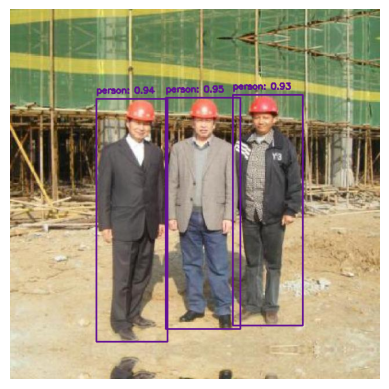

In [7]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('/content/Person.pt')

# Load the image
image_path = '/content/drive/MyDrive/datasets/whole_image.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Perform prediction
results = model.predict(source=image)

# Get the prediction results
predictions = results[0]

# Extract the bounding boxes, confidences, and class IDs
boxes = predictions.boxes.xyxy.cpu().numpy()  # Bounding boxes in (x1, y1, x2, y2) format
confidences = predictions.boxes.conf.cpu().numpy()  # Confidence scores
class_ids = predictions.boxes.cls.cpu().numpy()  # Class IDs

# Define class names (replace with your own class names)
class_names = ['person', 'hard-hat', 'gloves', 'mask', 'glasses', 'boots', 'vest', 'ppe-suit', 'ear-protector', 'safety-harness']

# Generate a unique color for each class
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

# Loop over the predictions and draw bounding boxes
for box, conf, class_id in zip(boxes, confidences, class_ids):
    x1, y1, x2, y2 = map(int, box)
    color = colors[int(class_id)]  # Get the color corresponding to the class ID
    label = f"{class_names[int(class_id)]}: {conf:.2f}"

    # Draw the bounding box with the class-specific color
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

    # Put the label text above the bounding box
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Save the image with bounding boxes
cv2.imwrite('output_image.jpg', image)

# Alternatively, display the image in the notebook
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# **Detecting PPE**


0: 640x640 3 persons, 3 hard-hats, 6 bootss, 36.2ms
Speed: 1.5ms preprocess, 36.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


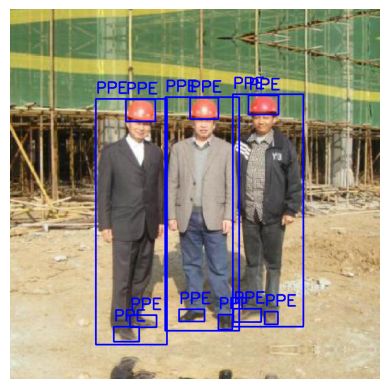

In [18]:
ppe_model = YOLO('/content/PPE.pt')

def visualize_single_ppe_prediction(model, img_path):
    # Ensure img_path is a file
    if not os.path.isfile(img_path):
        raise FileNotFoundError(f"{img_path} is not a valid file")

    img = cv2.imread(img_path)

    # Check if the image was loaded correctly
    if img is None:
        print(f"Failed to load image: {img_path}")
        return

    results = model(img)
    for box in results[0].boxes.xyxy:
        xmin, ymin, xmax, ymax = map(int, box)
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(img, 'PPE', (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage
visualize_single_ppe_prediction(ppe_model, '/content/drive/MyDrive/datasets/whole_image.jpg')


# **Prediction**


0: 640x640 3 persons, 3 hard-hats, 6 bootss, 3120.5ms
Speed: 3.7ms preprocess, 3120.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


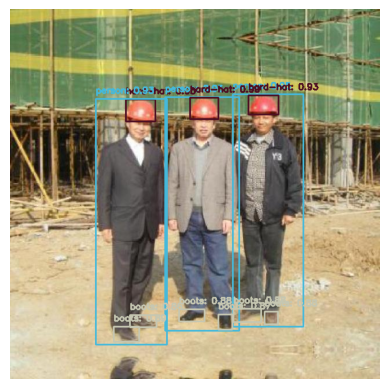

In [14]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('/content/best2.pt')

# Load the image
image_path = '/content/drive/MyDrive/datasets/whole_image.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Perform prediction
results = model.predict(source=image)

# Get the prediction results
predictions = results[0]

# Extract the bounding boxes, confidences, and class IDs
boxes = predictions.boxes.xyxy.cpu().numpy()  # Bounding boxes in (x1, y1, x2, y2) format
confidences = predictions.boxes.conf.cpu().numpy()  # Confidence scores
class_ids = predictions.boxes.cls.cpu().numpy()  # Class IDs

# Define class names (replace with your own class names)
class_names = ['person', 'hard-hat', 'gloves', 'mask', 'glasses', 'boots', 'vest', 'ppe-suit', 'ear-protector', 'safety-harness']

# Generate a unique color for each class
colors = np.random.uniform(0, 255, size=(len(class_names), 3))

# Loop over the predictions and draw bounding boxes
for box, conf, class_id in zip(boxes, confidences, class_ids):
    x1, y1, x2, y2 = map(int, box)
    color = colors[int(class_id)]  # Get the color corresponding to the class ID
    label = f"{class_names[int(class_id)]}: {conf:.2f}"

    # Draw the bounding box with the class-specific color
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

    # Put the label text above the bounding box
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Save the image with bounding boxes
cv2.imwrite('output_image.jpg', image)

# Alternatively, display the image in the notebook
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
